<p><strong>Geotechnical Calculator and Engineering Notebook <br>
   An Engineering App</strong></p>

<p>This Jupyter site is for exploring the use of python for engineering calculations. Enjoy. Kindly keep your work inside the ./shared/jupyter-python/geotechnical/ folder. You can start off working in this scratchpad. Once you get going, you can develop your first calculation procedures in your own Notebook (File -> New Notebook). </p>

<p><i>Jupyter runs on python 3 (you will need to read your python documentation accordingly).</i></p>

In [1]:
import sys
import numpy as np #from numpy import *
import matplotlib.pyplot as plt
pi=np.pi
#%matplotlib inline

In [2]:
# Simple example of defining and using a python function for UCS

In [3]:
def ucs(c,phi):
    # calculate unconfined compressive strength (UCS) from cohesion and friction angle
    sigma_u_comp = (2 * c * np.cos(phi * np.pi / 180.)) / (1 - np.sin(phi * np.pi / 180. ))
    return c, phi, sigma_u_comp

In [41]:
ucs(0.2, 30)

(0.2, 30, 0.692820323027551)

In [5]:
# Example for UCS of a jointed rock material

In [6]:
def ucs_anisotropic(c,phi,beta):
    # calculate unconfined compressive strength (UCS) from cohesion, friction angle and 
    # slope (measured from horizontal) of a single weak failure plane
    # reference: Rock Mechanics for Underground Mining, Brady and Brown, 1985, Sect. 4.6, Eqn. 4.27 (page 114)
    beta = np.array(beta)   # beta array input
    sigma_u_comp = (2 * c / 
               ( (1 - np.tan(phi * np.pi / 180.) * (1 / np.tan(beta * np.pi / 180.)) ) 
                  * np.sin(2*beta * np.pi / 180.))
               )      
    return c, phi, beta, sigma_u_comp
    # we should differentiate between testing, empirical and computed data 

In [7]:
ucs_anisotropic(1000.0,20,[40.0,50.0,60.0,70.0,80.0])

(1000.0,
 20,
 array([40., 50., 60., 70., 80.]),
 array([3586.57705063, 2923.80440016, 2923.80440016, 3586.57705063,
        6248.63208881]))

In [8]:
beta = np.linspace(30,80,10)
#print (ucs_anisotropic(1000.0,30.0,beta))
plt.plot(beta,ucs_anisotropic(1000.0,20.0,beta)[3])

In [9]:
# Example for ground reaction curve

In [10]:
def TunnelConvergence_ElastoPerfectPlastic_DuncanFama(P,P_support,E,nu,phi,c,r_excv):
    # Duncan - Fama, 1993 (from 12_Tunnels_in_weak_rock, Hoek's corner)
    P_support = np.array(P_support)   # P_support array input
    #     
    sigma_u = (2 * c * np.cos(phi * pi / 180.)) / (1 - np.sin(phi * pi / 180. ))
    N_phi = (1 + np.sin(phi * pi / 180. )) / (1 - np.sin(phi * pi / 180. ))
    r_plastic = (r_excv * 
                 ((2 * (P + (sigma_u / (N_phi - 1)))) / ((N_phi + 1) * (P_support + (sigma_u / (N_phi - 1)))))
                 **(1 / (N_phi - 1))
                 )
    P_critical = (2*P - sigma_u) / (1+N_phi)
    u_excv_elastic = ( (r_excv*(1+nu)/E) * (P - P_support) )
    u_excv = ( (r_excv*(1+nu)/E)  
              * ( 2*(1-nu)*(P-P_critical)*np.square(r_plastic/r_excv) - (1-2*nu)*(P - P_support) ) )
    return sigma_u,u_excv_elastic, u_excv, r_plastic, P_critical

In [11]:
# Verification from 12_Tunnels_in_weak_rock, Hoek's corner, Figure 4
# Duncan - Fama, 1993
P_supp = np.linspace(7, 0, 15) 
P_critical = TunnelConvergence_ElastoPerfectPlastic_DuncanFama(7,P_supp,1800,0.3,23,1.5,5)[4]
P_supp = np.concatenate([np.linspace(7, P_critical,num=5),np.linspace(P_critical,0,num=10)])
print ("P_critical=",P_critical)
plt.plot((TunnelConvergence_ElastoPerfectPlastic_DuncanFama(7,P_supp[P_supp>=P_critical],1800,0.3,23,1.5,5)[1]), P_supp[P_supp>=P_critical])
plt.plot((TunnelConvergence_ElastoPerfectPlastic_DuncanFama(7,P_supp[P_supp<=P_critical],1800,0.3,23,1.5,5)[2]), P_supp[P_supp<=P_critical])

('P_critical=', 2.8841248203964236)


In [12]:
# rainfall example

In [13]:
# Berechnung Niederschlagsintentisät nach Hörler und Rhein (1962)
def Ni(K,B): # K: l*min/(ha*s), Ortskontante in Abhängigkeit Wiederkehrintervall. 
                 #B: Ortskonstante in [min]
    x = np.arange(1.,24.,1)     #zu berücksichtigende Regendauer
    T=5.*x   # Regendauer in min
    r=(K/(T+B))    #l/(s*ha), Regenintensität
    r_v=r*(T*60./10000.) #mm/m^2, Regenhöhe
    return r, r_v 

In [14]:
Ni(3500.,10.) #Ortskonstanten für Basel

(array([233.33333333, 175.        , 140.        , 116.66666667,
        100.        ,  87.5       ,  77.77777778,  70.        ,
         63.63636364,  58.33333333,  53.84615385,  50.        ,
         46.66666667,  43.75      ,  41.17647059,  38.88888889,
         36.84210526,  35.        ,  33.33333333,  31.81818182,
         30.43478261,  29.16666667,  28.        ]),
 array([ 7.        , 10.5       , 12.6       , 14.        , 15.        ,
        15.75      , 16.33333333, 16.8       , 17.18181818, 17.5       ,
        17.76923077, 18.        , 18.2       , 18.375     , 18.52941176,
        18.66666667, 18.78947368, 18.9       , 19.        , 19.09090909,
        19.17391304, 19.25      , 19.32      ]))

In [15]:
#plotting rainfall function over time

In [16]:
# fig, ax1 = plt.subplots()
# x = np.arange(1.,24.,1)
# T=5.*x   # Regendauer in min
# ax1.plot(T, Ni(3500.,10.)[0], 'b-')
# ax1.set_xlabel('Niederschlagsdauer $[min]$')
# ax1.set_ylabel('Regenintensität $[l/(s \cdot ha)]$', color='b')
# for tl in ax1.get_yticklabels():
#     tl.set_color('b')

# ax2 = ax1.twinx()
# ax2.plot(T, Ni(3500.,10.)[1], 'r.')
# ax2.set_ylabel('Niederschlagshöhe $[mm]$', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')
# plt.show()

Stress around a circular hole in an infinite elastic material - after Kirsch
('Unit weight g =', 25.0, 'kNm3')
('Overburden T =', 500.0, 'm')
('Verrtical in-situ stress sv =', 12500.0, 'kPa')
('k0x =', 1.0, '-')
('Horizotal in-situ stress sh =', 12500.0, 'kPa')
('Mean stress P0 =', 12500.0, 'kPa')
('Deviatoric stress Q =', 0.0, 'kPa')
('Angle =', 45.0, '\xc2\xb0')
('Radial stress @ extrados sr =', 0.0, 'kPa')
('Tangential stress @ extrados st =', 25000.0, 'kPa')
('Shear stress @ extrados ss =', 0.0, 'kPa')


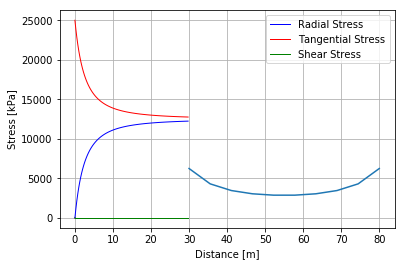

In [17]:
# 2D Stress around a circle in an infinite elastic continuum
# Kirsch. 1898. Die Theorie der Elastizität und die Bedürfnisse der Festigkeitslehre.
# Zeitschrift des Vereines deutscher Ingenieure. 42. 797–807.
#
# Modules
#
import math
import numpy as np
import matplotlib.pyplot as plt
#
# Variables
#
overburden = 500.0  # m
unit_weight = 25.0  # kN/m3
k0x = 1.0  # -
Outside_Diameter = 10.0  # m
theta_deg = 45.0  # °
#
# Formulas
#
Distance = np.arange(0., Outside_Diameter * 3, Outside_Diameter / 40)  # m
Outside_Radius = Outside_Diameter / 2
Outside_Distance = Outside_Radius + Distance
theta_rad = theta_deg * math.pi / 180  # -
y_stress = overburden * unit_weight  # MPa
x_stress = y_stress * k0x
mean_stress = (y_stress + x_stress) / 2
dev_stress = (y_stress - x_stress) / 2
#
# Radial Stress
rad_stress = y_stress / 2 * ((1 + k0x) * (1 - Outside_Radius ** 2 / Outside_Distance ** 2)
                             - (1 - k0x) * (1 - 4 * Outside_Radius ** 4 / Outside_Distance ** 4
                                            + 3 * Outside_Radius ** 3 / Outside_Distance ** 3)
                             * math.cos(2 * theta_rad))
#
# Tangential Stress
tan_stress = y_stress / 2 * ((1 + k0x) * (1 + Outside_Radius ** 2 / Outside_Distance ** 2)
                             + (1 - k0x) * (1 + 3 * Outside_Radius ** 3 / Outside_Distance ** 3)
                             * math.cos(2 * theta_rad))
#
# Shear Stress
shear_stress = y_stress / 2 * ((1 - k0x) * (1 + 2 * Outside_Radius ** 2 / Outside_Distance ** 2
                                            - 3 * Outside_Radius ** 4 / Outside_Distance ** 4)
                               * math.sin(2 * theta_rad))
#
# Print
#
print("Stress around a circular hole in an infinite elastic material - after Kirsch")
print("Unit weight g =", round(unit_weight, 1), "kNm3")
print("Overburden T =", round(overburden, 0), "m")
print("Verrtical in-situ stress sv =", round(y_stress, 0), "kPa")
print("k0x =", round(k0x, 2), "-")
print("Horizotal in-situ stress sh =", round(x_stress, 0), "kPa")
print("Mean stress P0 =", round(mean_stress, 0), "kPa")
print("Deviatoric stress Q =", round(dev_stress, 0), "kPa")
print("Angle =", round(theta_deg, 0), "°")
print("Radial stress @ extrados sr =", round(rad_stress[0], 0), "kPa")
print("Tangential stress @ extrados st =", round(tan_stress[0], 0), "kPa")
print("Shear stress @ extrados ss =", round(shear_stress[0], 0), "kPa")
#
# Plot
#
plt.plot(Distance, rad_stress, 'b', label='Radial Stress', linewidth=1)  # x1, y1, colour, label, line
plt.plot(Distance, tan_stress, 'r', label='Tangential Stress', linewidth=1)  # x1, y1, colour, label, line
plt.plot(Distance, shear_stress, 'g', label='Shear Stress', linewidth=1)  # x1, y1, colour, label, line
#
plt.grid(True)  # gridlines
plt.ylabel('Stress [kPa]')  # grid label
plt.xlabel('Distance [m]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window


Stress around a circular hole in an infinite elasto-plastic material - after Salencon
('Friction f = ', 30.0, '\xc2\xb0')
('Cohesion c =', 500.0, 'kPa')
('UCS =', 1732.0, 'kPa')
('Kp =', 3.0, '-')
('Support pressure P =', 0.0, 'kPa')
('Unit weight g =', 25.0, 'kNm3')
('Overburden T =', 70.0, 'm')
('k0x =', 1.0, '-')
('Mean stress P0=', 1750.0, 'kPa')
('Radial stress @ extrados sr =', 0.0, 'kPa')
('Tangential stress @ extrados st =', 1732.0, 'kPa')
('Plastic radius R0 =', 5.4, 'm')


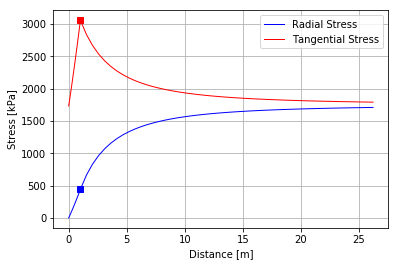

In [43]:
# 2D Stress around a circle in an infinite plastic continuum
# Salencon, J. 1969. Contraction Quasi-Statique D’une Cavite a Symetrie Spherique Ou Cylindrique Dans
# Un Milieu Elasto-Plastique. Annales Des Ports Et Chaussees. Vol. 4. pp. 231-236.
#
# Modules
#
import math
import numpy as np
import matplotlib.pyplot as plt
#
# Variables
#
Cohesion = 500.0  # kPa
Friction = 30.0  # °
unit_weight = 25.0  # kN/m3
overburden = 70.0  # m
k0x = 1.0  # -
Support_Pressure = 0.0  # kPa
Outside_Diameter = 8.8  # m
#
# Formulas
#
# Initial calculations
Outside_Radius = Outside_Diameter / 2
# Passive earthpressure coefficient
Kp = (1.0 + math.sin(Friction * math.pi / 180.0)) / (1.0 - math.sin(Friction * math.pi / 180.0))
# UCS
q = 2.0 * Cohesion * math.tan((45 + Friction / 2) * math.pi / 180)
# Mean stress
P0 = 1.0 / 2.0 * overburden * unit_weight * (1 + k0x)
# Plastic radius
R0 = Outside_Radius * ((2 / (Kp + 1)) * (P0 + q / (Kp - 1.0)) / (Support_Pressure + q / (Kp - 1))) ** (1 / (Kp - 1))
# Radial stress @
sri = 1 / (Kp + 1.0) * (2.0 * P0 - q)
# Ranges
Elastic_range = np.arange(R0, Outside_Diameter * 3 + Outside_Radius, (Outside_Diameter * 3 - R0) / 40)  # m
Plastic_range = np.arange(Outside_Radius, Elastic_range[0], (R0 - Outside_Radius) / 40)  # m
#
# Radial & tangential stress
#
sre = P0 - (P0 - sri) * (R0 / Elastic_range) ** 2
ste = P0 + (P0 - sri) * (R0 / Elastic_range) ** 2
srp = - q / (Kp - 1) + (Support_Pressure + q / (Kp - 1)) * (Plastic_range / Outside_Radius) ** (Kp - 1)
stp = - q / (Kp - 1) + Kp * (Support_Pressure + q / (Kp - 1)) * (Plastic_range / Outside_Radius) ** (Kp - 1)
#
# Print
#
print("Stress around a circular hole in an infinite elasto-plastic material - after Salencon")
print("Friction f = ", round(Friction, 1), "°")
print("Cohesion c =", round(Cohesion, 0), "kPa")
print("UCS =", round(q, 0), "kPa")
print("Kp =", round(Kp, 2), "-")
print("Support pressure P =", round(Support_Pressure, 0), "kPa")
print("Unit weight g =", round(unit_weight, 1), "kNm3")
print("Overburden T =", round(overburden, 0), "m")
print("k0x =", round(k0x, 2), "-")
print("Mean stress P0=", round(P0, 0), "kPa")
print("Radial stress @ extrados sr =", round(srp[0], 0), "kPa")
print("Tangential stress @ extrados st =", round(stp[0], 0), "kPa")
print("Plastic radius R0 =", round(R0, 1), "m")
#
# Plot
#
Plastic_Disance = Plastic_range - Outside_Radius
Elastic_Distance = Elastic_range - Outside_Radius
#
plt.plot(Plastic_Disance, srp, 'b', label='Radial Stress', linewidth=1)  # x1, y1, colour, label, line
plt.plot(Elastic_Distance, sre, 'b', linewidth=1)  # x1, y1, colour, label, line
plt.plot(Plastic_Disance, stp, 'r', label='Tangential Stress', linewidth=1)  # x1, y1, colour, label, line
plt.plot(Elastic_Distance, ste, 'r', linewidth=1)  # x1, y1, colour, label, line
plt.plot((R0 - Outside_Radius), ste[0], "rs")  # x1, y1, colour & marker
plt.plot((R0 - Outside_Radius), sre[0], "bs")  # x1, y1, colour & marker
#
plt.grid(True)  # gridlines
plt.ylabel('Stress [kPa]')  # grid label
plt.xlabel('Distance [m]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window

Radial flow towards a well in an unconfined aquifer - after Dupuis
('Well depth H =', 30.0, 'm')
('Water level in well h0 =', 20.0, 'm')
('Well radius r0 =', 0.15, 'm')
('Hydraulic conductivity k =', 1e-05, 'm/s')
('Influence radius R =', 95.0, 'm')
('Punmping quantity Q =', 0.002, 'm3/s')


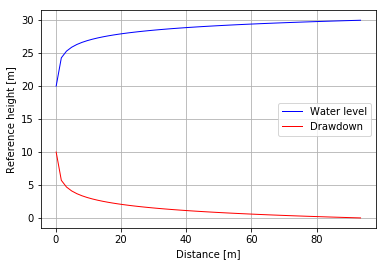

In [19]:
# Radial flow towards a well
# Darcy, H. 1856. Les Fontaines Publiques de la Ville de Dijon. Paris, France: Victor Dalmont.
# Dupuit, J. 1863. Etudes Theoriques et Pratiques sur le Mouvement des Eaux dans les Canaux Decouverts et a Travers
# les Terrains Permeables, 2nd ed. Paris, France: Dunod.
# Dupuit, J. 1857. Memoire sur le mouvement des eaux dans les terrains permeables. Memoire depose en 1857,
# rapporte aux Comptes Rendus des seances de l’Academie des Sciences, Paris, tome LII, seance du 3 juin 1861.
# Sichardt, W. 1928. Das Fassungsvermögen von Rohrbrunnen und seine Bedeutung für die Grundwasserabsenkung,
# insbesondere für größere Absenkungstiefen. Berlin, Germany: Julius Springer.
#
# Modules
#
import math
import numpy as np
import matplotlib.pyplot as plt
#
# Variables
#
H = 30.  # m - Borehole depth
h0 = 20.  # m - Water level in borehole
k = 0.00001  # m/s - Hydraulic conductivity
r0 = 0.15  # m - Borehole radius
#
# Formulas
#
R = 3000 * (H - h0) * k ** 0.5  # m - Well radius after Sichardt
Q = k * math.pi * (H ** 2 - h0 ** 2) / np.log(R / r0)  # Pumping discharge
x = np.arange(r0, R, R / 60)
y = (H ** 2 - Q * np.log(R / x) / (math.pi * k)) ** 0.5
#
# Print
#
print("Radial flow towards a well in an unconfined aquifer - after Dupuis")
print("Well depth H =", round(H, 0), "m")
print("Water level in well h0 =", round(h0, 0), "m")
print("Well radius r0 =", r0, "m")
print("Hydraulic conductivity k =", k, "m/s")
print("Influence radius R =", round(R, 0), "m")
print("Punmping quantity Q =", round(Q, 3), "m3/s")
#
# Plot
#
plt.plot(x, y, 'b', label="Water level", linewidth=1)  # x1, y1, colour, label, line
plt.plot(x, H - y, 'r', label="Drawdown", linewidth=1)  # x1, y1, colour, label, line
#
plt.grid(True)  # gridlines
plt.ylabel('Reference height [m]')  # grid label
plt.xlabel('Distance [m]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window

Planar flow towards a trench in an unconfined aquifer - after Dupuis
('Max. drawdown H =', 5.0, 'm')
('Water level in trench h0 =', 1.0, 'm')
('Hydraulic conductivity k =', 1e-05, 'm/s')
('Influence reach R =', 38.0, 'm')
('Flow q =', 3.16e-06, 'm/s')
('Punmping quantity Q =', 3.16e-06, "m3/s/m'")


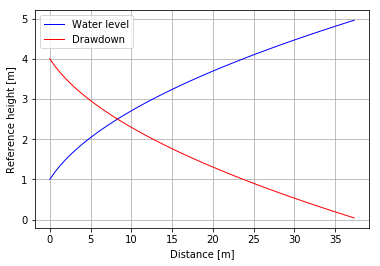

In [20]:
# Planaer flow towards a trench
# Darcy, H. 1856. Les Fontaines Publiques de la Ville de Dijon. Paris, France: Victor Dalmont.
# Dupuit, J. 1863. Etudes Theoriques et Pratiques sur le Mouvement des Eaux dans les Canaux Decouverts et a Travers
# les Terrains Permeables, 2nd ed. Paris, France: Dunod.
# Dupuit, J. 1857. Memoire sur le mouvement des eaux dans les terrains permeables. Memoire depose en 1857,
# rapporte aux Comptes Rendus des seances de l’Academie des Sciences, Paris, tome LII, seance du 3 juin 1861.
# Sichardt, W. 1928. Das Fassungsvermögen von Rohrbrunnen und seine Bedeutung für die Grundwasserabsenkung,
# insbesondere für größere Absenkungstiefen. Berlin, Germany: Julius Springer.
#
# Modules
#
import math
import numpy as np
import matplotlib.pyplot as plt
#
# Variables
#
H = 5.  # m - Borehole depth
h0 = 1.  # m - Water level in borehole
k = 0.00001  # m/s - Hydraulic conductivity
#
# Formulas
#
R = 3000 * (H - h0) * k ** 0.5  # m - Well radius after Sichardt
q = k /2 * (H ** 2 - h0 ** 2) / R  # Pumping discharge
x = np.arange(0, R, R / 60)
y = (x / R * (H ** 2 - h0 ** 2) + h0 ** 2) ** 0.5
#
# Print
#
print("Planar flow towards a trench in an unconfined aquifer - after Dupuis")
print("Max. drawdown H =", round(H, 0), "m")
print("Water level in trench h0 =", round(h0, 0), "m")
print("Hydraulic conductivity k =", k, "m/s")
print("Influence reach R =", round(R, 0), "m")
print("Flow q =", round(q, 8), "m/s")
print("Punmping quantity Q =", round(q * h0, 8), "m3/s/m'")
#
# Plot
#
plt.plot(x, y, 'b', label="Water level", linewidth=1)  # x1, y1, colour, label, line
plt.plot(x, H - y, 'r', label="Drawdown", linewidth=1)  # x1, y1, colour, label, line
#
plt.grid(True)  # gridlines
plt.ylabel('Reference height [m]')  # grid label
plt.xlabel('Distance [m]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window

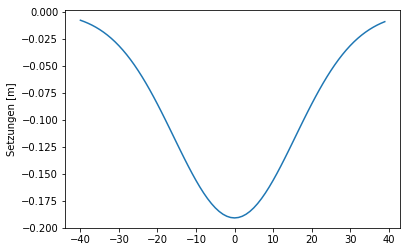

In [21]:
from numpy import *
import matplotlib.pyplot as plt

def Settlementtrough(D_exc,D_t,K,z):   #Ausbruchsradius, Tunnelradius, K-wert Boden, Überdeckung
    x=arange(-40,40,1.0)
    z_0=z+D_t/2
    i_0=K*z_0
    A_exc = ((D_exc**2.0) * pi) / 4.0
    A_t = ((D_t**2.0) * pi) / 4.0
    V_l= (A_exc - A_t) / A_exc
    S= -((pi/2)**(0.5)) * (V_l*(D_t**2))/(4*i_0) *exp(-(x**2)/(2*i_0**2))
    s_max=min(S)
    return S

fig=plt.figure()
x=arange(-40,40,1.0)
p1 = plt.plot(x, Settlementtrough(13.0,12.6,0.6,20.0))
plt.ylabel('Setzungen [m]')
plt.show()



In [22]:
# experimenting with data orgnaisation
# this data represents a single data record and is to be included in an array of alldata records
E={}
E['value'] = 10000.0
E['value_unit'] = 'MPa' 
E['value_likelihood'] = 'data point' 
E['value_scale'] = 'intact rock', 'intact rock', 'intact rock'
E['x_project_coord'] = 100000.0
E['y_project_coord'] = 600000.0
E['elevation_masl'] = 500.0 

In [23]:
E={'project':'Nam E-Moon', 'value':10000.0, 'value_unit':'MPa', 'value_likelihood':'average', 'value_scale':'intact rock','x_project_coord':100000.0, 'y_project_coord':600000.0}   

In [24]:
E['value_unit']

'MPa'

In [25]:
E['value']

10000.0

In [26]:
E

{'project': 'Nam E-Moon',
 'value': 10000.0,
 'value_likelihood': 'average',
 'value_scale': 'intact rock',
 'value_unit': 'MPa',
 'x_project_coord': 100000.0,
 'y_project_coord': 600000.0}

In [27]:
E.keys()

['x_project_coord',
 'y_project_coord',
 'value_scale',
 'value',
 'project',
 'value_likelihood',
 'value_unit']

In [28]:
E.values()

[100000.0, 600000.0, 'intact rock', 10000.0, 'Nam E-Moon', 'average', 'MPa']

In [29]:
E.items()

[('x_project_coord', 100000.0),
 ('y_project_coord', 600000.0),
 ('value_scale', 'intact rock'),
 ('value', 10000.0),
 ('project', 'Nam E-Moon'),
 ('value_likelihood', 'average'),
 ('value_unit', 'MPa')]

Think about: select e.g. all E 'values' for 'elevation_masl' between 500 and 600

In [30]:
#import pandas

In [31]:
class Test(list):
    """testing lists"""
    def EtoG(self):    #method for converting E-modulus to G-modulus
        print(self)
        G=[i /1.4 for i in self]
        return G
E = Test((1,2,3,4))    #list comes from e.g. Data Organiser
E
# Why isn't subclassing a list a good idea (Stack Overflow suggests not a good idea)?
# Is just using funcions a better way for doing this?
#    - I would however like to limit the use of EtoG to certain objects (e.g. E)
#    - advice seems to be: functions for general use, methods for use by selected objects

[1, 2, 3, 4]

In [32]:
G=E.EtoG();
G

[1, 2, 3, 4]


[0.7142857142857143, 1.4285714285714286, 2.142857142857143, 2.857142857142857]

In [33]:
E.value=50.0    #add an attribute

In [34]:
E.value

50.0

In [35]:
88*2

176

Blasting induced vibration - after DIN 4150-1
('Transfer factor K =', 1000.0, 'mm/s')
('Target amount of explosives per interval L =', 2.0, 'kg')
('Target Distance R =', 25.0, 'm')
('Coefficient for source type m =', 1.25, '-')
('Coefficient for energy dissipation b =', 0.65, '-')


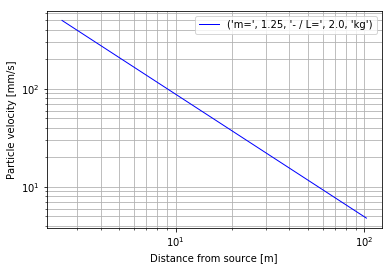

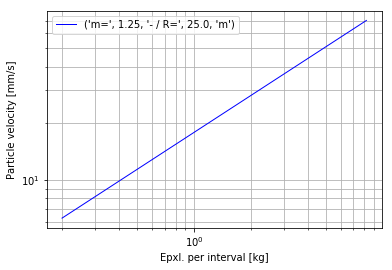

In [36]:
# Blasting induced vibrations
# According to DIN 4150-1
#
# Modules
#
import math
import numpy as np
import matplotlib.pyplot as plt
#
# Variables
#
K = 1000.  # mm/s - Transferfactor depending of the medium (1'000 mm/s for sandstone)
L_T = 2.  # kg - Target amount of explosives per interval
L = np.arange(L_T / 10, L_T * 5, L_T)  # m - Distance from source
L0 = 1.  # kg - Reference amount of explosives per interval (1 kg)
R_T = 25.  # m - Taget distance from source
R = np.arange(R_T / 10, R_T * 5, R_T)  # m - Distance from source
R0 = 1.  # m - Reference distnace (1 m)
m = 1.25  # - Damping coefficient representing wave type and radiation (1.0 - 1.5)
b = 0.65  # - Damping coefficient representing charge energy dissipation (0.5 - 0.8)
#
# Formulas
#
V_R = K * (L_T/L0)**b * (R/R0)**-m
V_L = K * (L/L0)**b * (R_T/R0)**-m
#
# Print
#
print("Blasting induced vibration - after DIN 4150-1")
print("Transfer factor K =", round(K, 0), "mm/s")
print("Target amount of explosives per interval L =", round(L_T, 0), "kg")
print("Target Distance R =", round(R_T, 0), "m")
print("Coefficient for source type m =", round(m, 2), "-")
print("Coefficient for energy dissipation b =", round(b, 2), "-")
#
# Plot
#
plt.loglog(R, V_R, 'b', label= ("m=", m, "- / L=", L_T,"kg"), linewidth=1)  # x, y, colour, label, line
#
plt.grid(True, which="both")  # gridlines
plt.ylabel('Particle velocity [mm/s]')  # grid label
plt.xlabel('Distance from source [m]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window
#
plt.loglog(L, V_L, 'b', label= ("m=", m, "- / R=", R_T, "m"), linewidth=1)  # x, y, colour, label, line
#
plt.grid(True, which="both")  # gridlines
plt.ylabel('Particle velocity [mm/s]')  # grid label
plt.xlabel('Epxl. per interval [kg]')  # grid label
plt.legend()  # legend
plt.show()  # opens plot window